PART 1

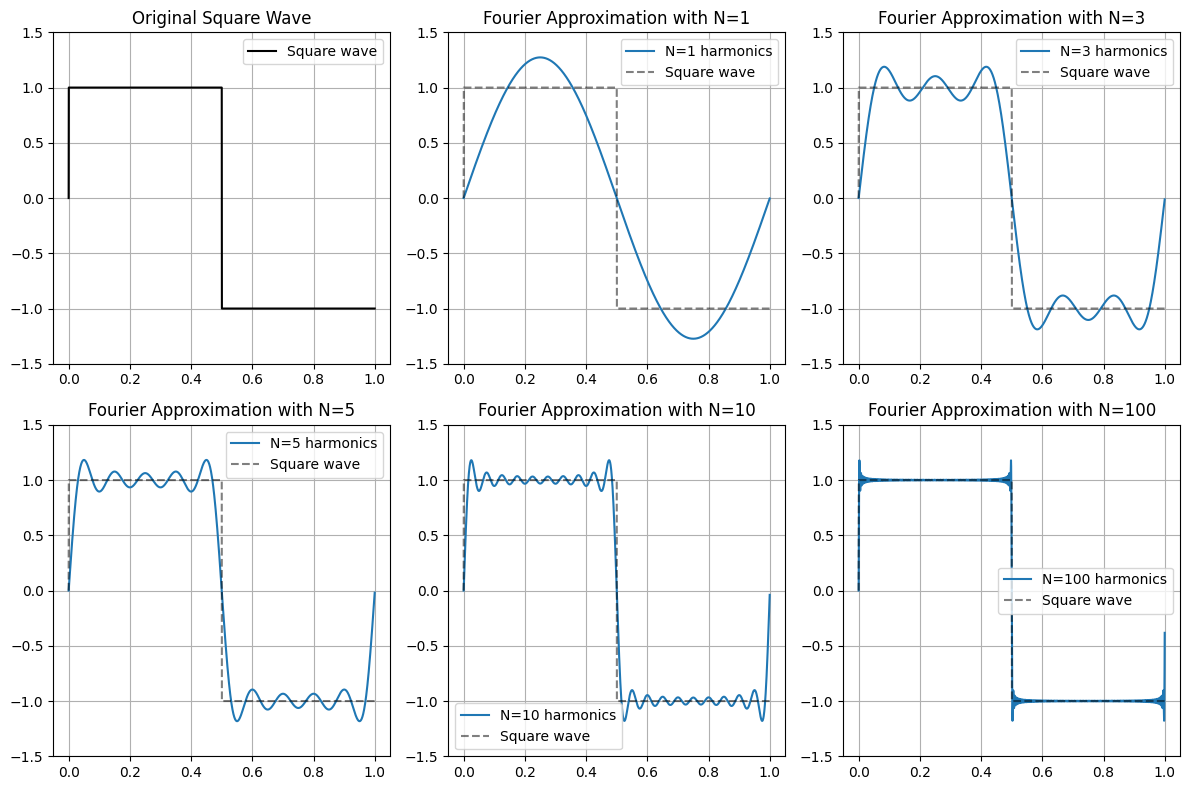

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
# Set parameters for the signal
N = 2048 # Number of sample points
T = 1.0 # Duration of the signal in seconds
f0 = 1 # Fundamental frequency of the square wave in Hz
# List of harmonic numbers used to construct the square wave
harmonics = [1, 3, 5, 10, 100] #added these two to answer what happens for more
# Define the square wave function
def square_wave(t):
    return np.sign(np.sin(2.0 * np.pi * f0 * t))
# Fourier series approximation of the square wave
def square_wave_fourier(t, f0, N):
    result = np.zeros_like(t)
    for k in range(N):
            # The Fourier series of a square wave contains only odd harmonics.
            n = 2 * k + 1
            # Add harmonics to reconstruct the square wave.
            result += np.sin(2 * np.pi * n * f0 * t) / n
    return (4 / np.pi) * result
# Create the time vector
# np.linspace generates evenly spaced numbers over a specified interval.
# We use endpoint=False because the interval is periodic.
t = np.linspace(0.0, T, N, endpoint=False)
# Generate the original square wave
square = square_wave(t)
plt.figure(figsize=(12, 8))
# Plot the original square wave
plt.subplot(2, 3, 1)
plt.plot(t, square, 'k', label="Square wave")
plt.title("Original Square Wave")
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.legend()
# Plot Fourier reconstructions under different number of harmonics
for i, Nh in enumerate(harmonics, start=2):
    plt.subplot(2, 3, i)
    y = square_wave_fourier(t, f0, Nh)
    plt.plot(t, y, label=f"N={Nh} harmonics")
    plt.plot(t, square, 'k--', alpha=0.5, label="Square wave")
    plt.title(f"Fourier Approximation with N={Nh}")
    plt.ylim(-1.5, 1.5)
    plt.grid(True)
    plt.legend()
plt.tight_layout()
plt.show()


Added some additional harmonics in last 2 plots - increases accuracy! seems to increase accuracy the least around the right angles

--- DFT/FFT Performance Comparison ---
Naïve DFT Execution Time: 1.399510 seconds
NumPy FFT Execution Time: 0.004941 seconds
FFT is approximately 283.22 times faster.

Our DFT implementation is close to NumPy's FFT: True


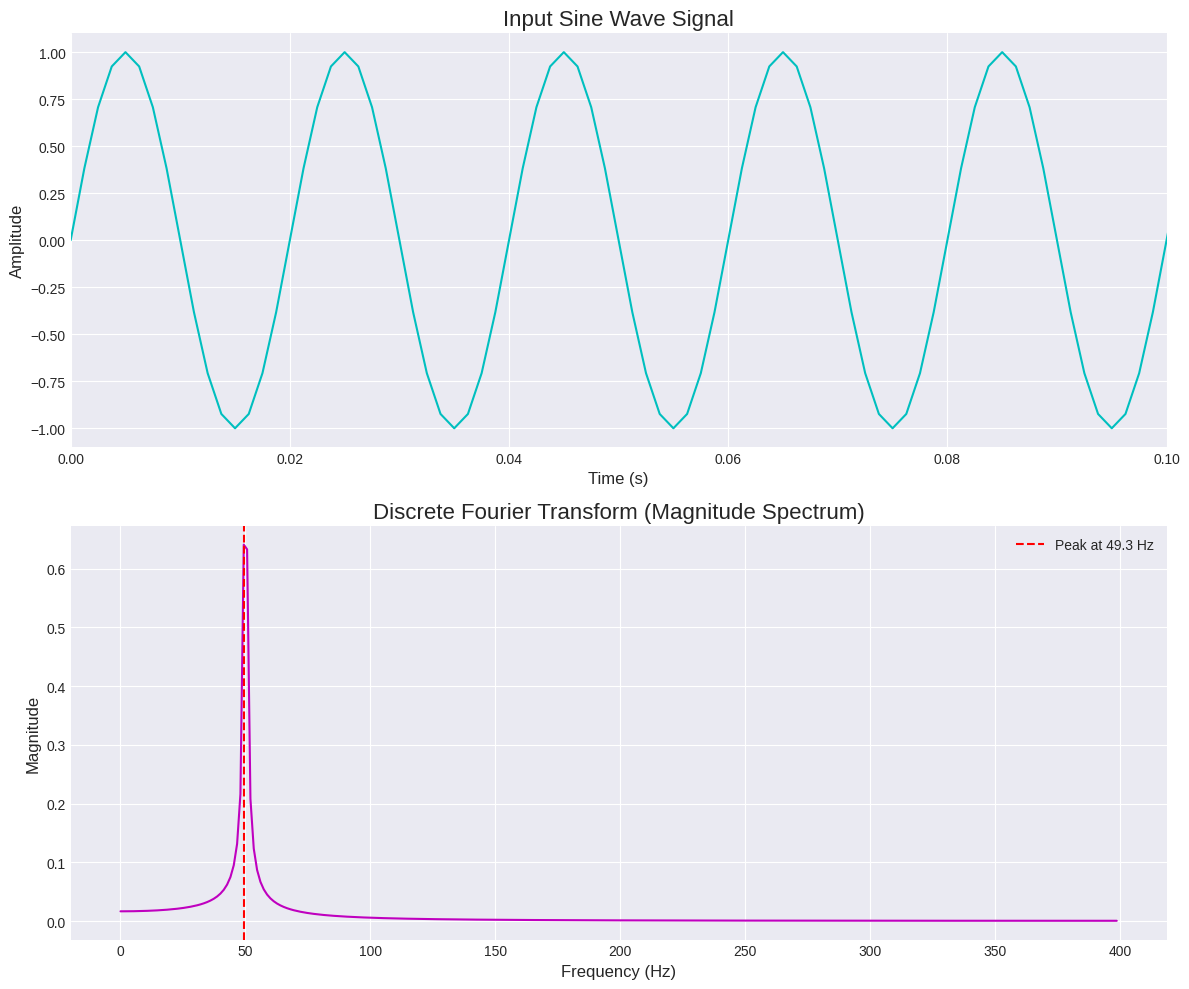

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

def naive_dft(x):
    """
    Computes the Discrete Fourier Transform (DFT) of a 1D signal.

    This is a "naïve" implementation that directly follows the DFT formula,
    which has a time complexity of O(N^2).

    Args:
        x (np.ndarray): The input signal, a 1D NumPy array.

    Returns:
        np.ndarray: The complex-valued DFT of the input signal.
    """
    N = len(x)
    # Create an empty array of complex numbers to store the DFT results
    X = np.zeros(N, dtype=np.complex128)

    # Iterate through each frequency bin (k)
    for k in range(N):
        # For each frequency bin, sum the contributions from all input samples (n)
        for n in range(N):
            # The core DFT formula: x[n] * e^(-2j * pi * k * n / N)
            angle = -2j * np.pi * k * n / N
            X[k] += x[n] * np.exp(angle)

    return X

# --- Main Script ---

# 1. Generate the Signal
# Parameters for the signal
N = 600                # Number of sample points
SAMPLE_RATE = 800.0    # Sampling rate in Hz
FREQUENCY = 50.0       # Frequency of the sine wave in Hz

# Calculate sample spacing
T = 1.0 / SAMPLE_RATE

# Create the time vector
# np.linspace generates evenly spaced numbers over a specified interval.
# We use endpoint=False because the interval is periodic.
t = np.linspace(0.0, N * T, N, endpoint=False)

# Create the sine wave signal
y = np.sin(FREQUENCY * 2.0 * np.pi * t)

# 2. Apply the DFT and Time the Execution

# Time the naïve DFT implementation
start_time_naive = time.time()
dft_result = naive_dft(y)
end_time_naive = time.time()
naive_duration = end_time_naive - start_time_naive

# Time NumPy's FFT implementation
start_time_fft = time.time()
fft_result = np.fft.fft(y)
end_time_fft = time.time()
fft_duration = end_time_fft - start_time_fft

# 3. Print Timings and Verification
print("--- DFT/FFT Performance Comparison ---")
print(f"Naïve DFT Execution Time: {naive_duration:.6f} seconds")
print(f"NumPy FFT Execution Time: {fft_duration:.6f} seconds")
# It's possible for the FFT to be so fast that the duration is 0.0, so we handle that case.
if fft_duration > 0:
    print(f"FFT is approximately {naive_duration / fft_duration:.2f} times faster.")
else:
    print("FFT was too fast to measure a significant duration difference.")

# Check if our implementation is close to NumPy's result
# np.allclose is used for comparing floating-point arrays.
print(f"\nOur DFT implementation is close to NumPy's FFT: {np.allclose(dft_result, fft_result)}")


# 4. Prepare for Plotting
# Generate the frequency axis for the plot.
# np.fft.fftfreq returns the DFT sample frequencies.
# We only need the first half of the frequencies (the positive ones) due to symmetry.
xf = np.fft.fftfreq(N, T)[:N//2]

# 5. Visualize the Results
plt.style.use('seaborn-v0_8-darkgrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the original time-domain signal
ax1.plot(t, y, color='c')
ax1.set_title('Input Sine Wave Signal', fontsize=16)
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Amplitude', fontsize=12)
ax1.set_xlim(0, 0.1) # Show a few cycles of the sine wave
ax1.grid(True)

# Plot the frequency-domain signal (magnitude of the DFT)
# We normalize the magnitude by N and multiply by 2 to get the correct amplitude.
magnitude = 2.0/N * np.abs(dft_result[0:N//2])
ax2.plot(xf, magnitude, color='m')
ax2.set_title('Discrete Fourier Transform (Magnitude Spectrum)', fontsize=16)
ax2.set_xlabel('Frequency (Hz)', fontsize=12)
ax2.set_ylabel('Magnitude', fontsize=12)
ax2.grid(True)

# Add a vertical line to mark the peak frequency
peak_freq_index = np.argmax(magnitude)
peak_freq = xf[peak_freq_index]
ax2.axvline(peak_freq, color='r', linestyle='--', label=f'Peak at {peak_freq:.1f} Hz')
ax2.legend()


plt.tight_layout()
plt.show()

Redone so that it works using PyTorch instead below!

Device used is cuda


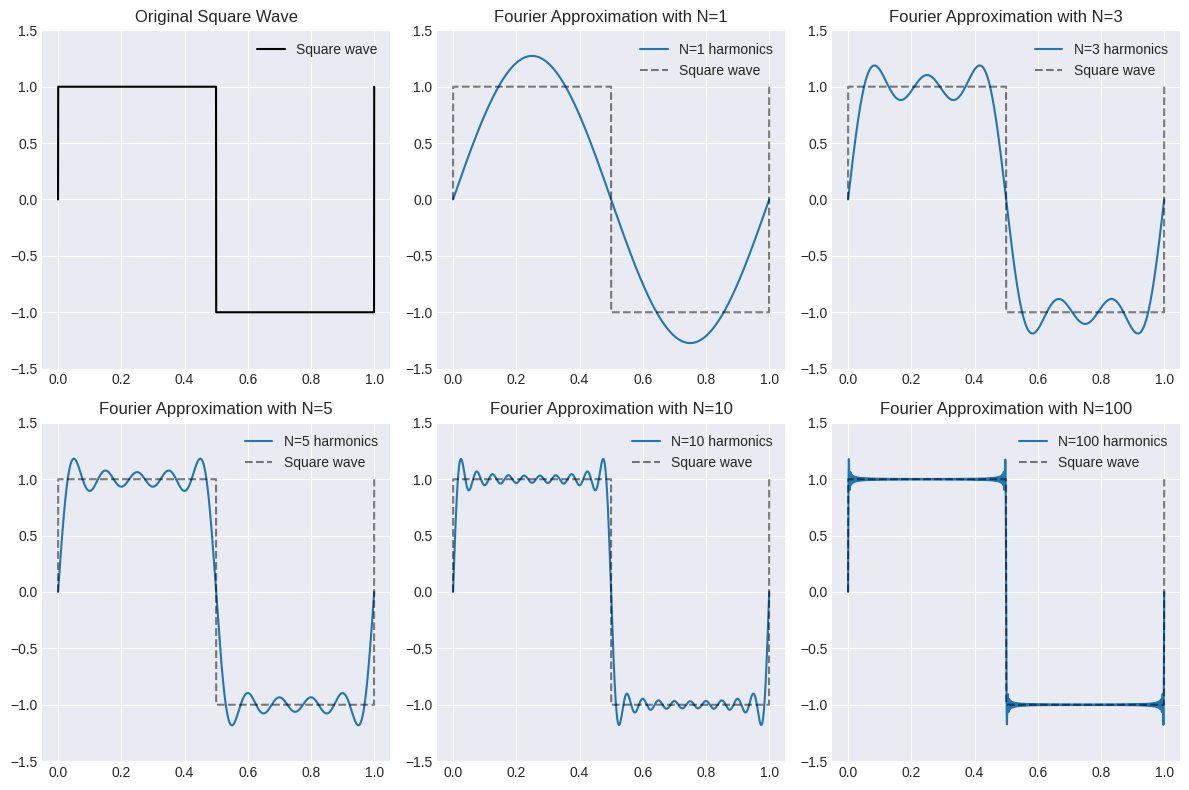

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import torch
# Set parameters for the signal
N = 2048 # Number of sample points
T = 1.0 # Duration of the signal in seconds
f0 = 1 # Fundamental frequency of the square wave in Hz
# List of harmonic numbers used to construct the square wave
harmonics = [1, 3, 5, 10, 100] #added these two to answer what happens for more
# Define the square wave function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device used is", device)
def square_wave(t):
    return torch.sign(torch.sin(2.0 * torch.pi * f0 * t))
# Fourier series approximation of the square wave
def square_wave_fourier(t, f0, N):
    result = torch.zeros_like(t)
    for k in range(N):
            # The Fourier series of a square wave contains only odd harmonics.
            n = 2 * k + 1
            # Add harmonics to reconstruct the square wave.
            result += torch.sin(2 * torch.pi * n * f0 * t) / n
    return (4 / torch.pi) * result
# Create the time vector
# np.linspace generates evenly spaced numbers over a specified interval.
# We use endpoint=False because the interval is periodic.
t = torch.linspace(0.0, T, N)
# Generate the original square wave
square = square_wave(t)
plt.figure(figsize=(12, 8))
# Plot the original square wave
plt.subplot(2, 3, 1)
plt.plot(t, square, 'k', label="Square wave")
plt.title("Original Square Wave")
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.legend()
# Plot Fourier reconstructions under different number of harmonics
for i, Nh in enumerate(harmonics, start=2):
    plt.subplot(2, 3, i)
    y = square_wave_fourier(t, f0, Nh)
    plt.plot(t.numpy(), y.numpy(), label=f"N={Nh} harmonics")
    plt.plot(t, square, 'k--', alpha=0.5, label="Square wave")
    plt.title(f"Fourier Approximation with N={Nh}")
    plt.ylim(-1.5, 1.5)
    plt.grid(True)
    plt.legend()
plt.tight_layout()
plt.show()


--- DFT/FFT Performance Comparison ---
Naïve DFT Execution Time: 0.025933 seconds
NumPy FFT Execution Time: 0.000156 seconds
FFT is approximately 166.06 times faster.

Our DFT implementation is close to NumPy's FFT: True


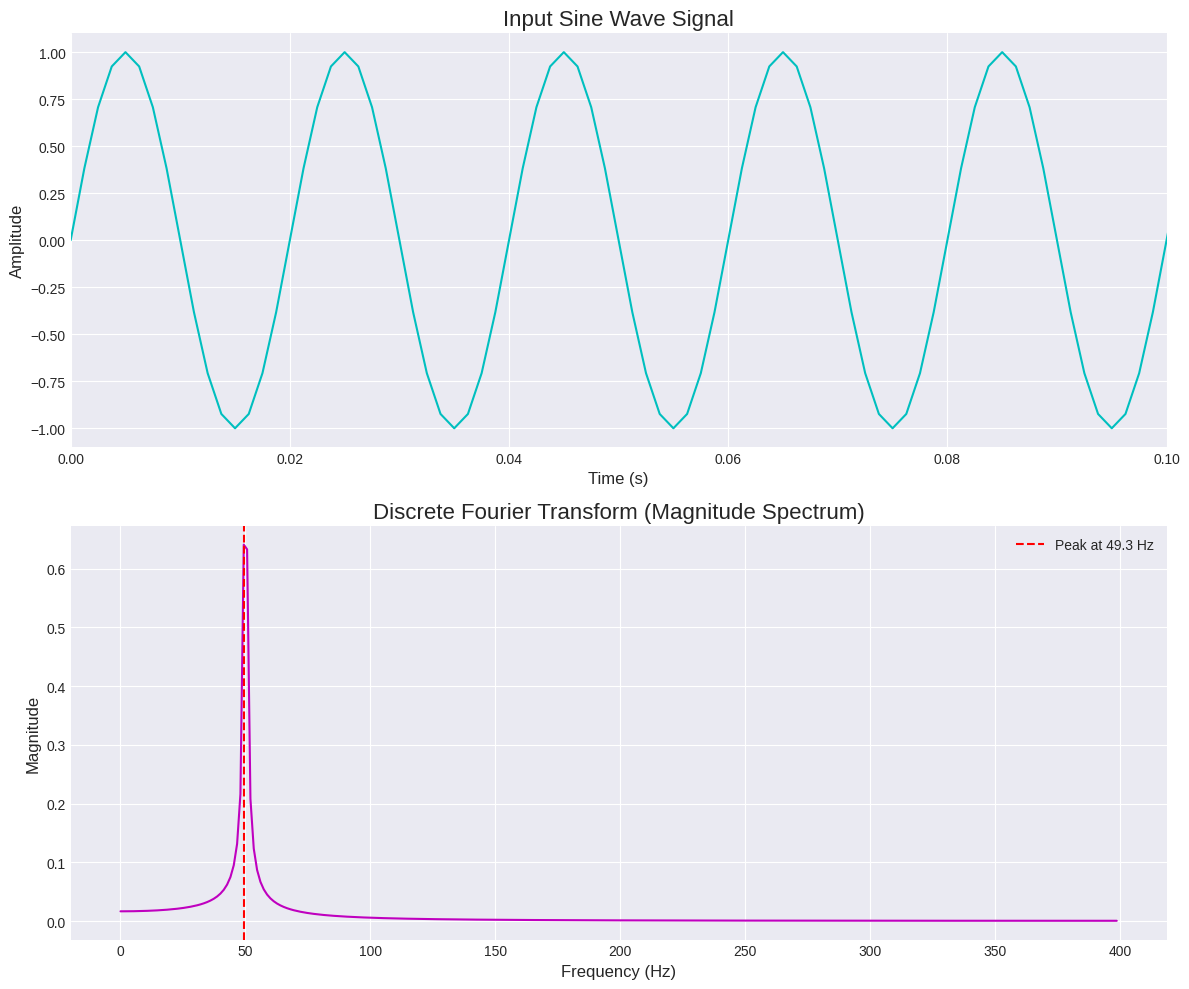

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

def naive_dft_torch(x, device="cpu"):
    x = torch.tensor(x, dtype=torch.complex128, device=device)
    N = x.shape[0]
    n = torch.arange(N, device=device, dtype=torch.float64)
    k = n.view(-1, 1)
    M = torch.exp(-2j * torch.pi * k * n / N)
    return torch.matmul(M, x)

# --- Main Script ---

# 1. Generate the Signal
# Parameters for the signal
N = 600                # Number of sample points
SAMPLE_RATE = 800.0    # Sampling rate in Hz
FREQUENCY = 50.0       # Frequency of the sine wave in Hz

# Calculate sample spacing
T = 1.0 / SAMPLE_RATE

# Create the time vector
# np.linspace generates evenly spaced numbers over a specified interval.
# We use endpoint=False because the interval is periodic.
t = np.linspace(0.0, N * T, N, endpoint=False)

# Create the sine wave signal
y = np.sin(FREQUENCY * 2.0 * np.pi * t)

# 2. Apply the DFT and Time the Execution

# Time the naïve DFT implementation
start_time_naive = time.time()
dft_result = naive_dft_torch(y)
end_time_naive = time.time()
naive_duration = end_time_naive - start_time_naive

# Time NumPy's FFT implementation
start_time_fft = time.time()
fft_result = np.fft.fft(y)
end_time_fft = time.time()
fft_duration = end_time_fft - start_time_fft

# 3. Print Timings and Verification
print("--- DFT/FFT Performance Comparison ---")
print(f"Naïve DFT Execution Time: {naive_duration:.6f} seconds")
print(f"NumPy FFT Execution Time: {fft_duration:.6f} seconds")
# It's possible for the FFT to be so fast that the duration is 0.0, so we handle that case.
if fft_duration > 0:
    print(f"FFT is approximately {naive_duration / fft_duration:.2f} times faster.")
else:
    print("FFT was too fast to measure a significant duration difference.")

# Check if our implementation is close to NumPy's result
# np.allclose is used for comparing floating-point arrays.
print(f"\nOur DFT implementation is close to NumPy's FFT: {np.allclose(dft_result.cpu().numpy(), fft_result)}")


# 4. Prepare for Plotting
# Generate the frequency axis for the plot.
# np.fft.fftfreq returns the DFT sample frequencies.
# We only need the first half of the frequencies (the positive ones) due to symmetry.
xf = np.fft.fftfreq(N, T)[:N//2]

# 5. Visualize the Results
plt.style.use('seaborn-v0_8-darkgrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the original time-domain signal
ax1.plot(t, y, color='c')
ax1.set_title('Input Sine Wave Signal', fontsize=16)
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Amplitude', fontsize=12)
ax1.set_xlim(0, 0.1) # Show a few cycles of the sine wave
ax1.grid(True)

# Plot the frequency-domain signal (magnitude of the DFT)
# We normalize the magnitude by N and multiply by 2 to get the correct amplitude.
magnitude = 2.0/N * np.abs(dft_result.cpu().numpy()[0:N//2])
ax2.plot(xf, magnitude, color='m')
ax2.set_title('Discrete Fourier Transform (Magnitude Spectrum)', fontsize=16)
ax2.set_xlabel('Frequency (Hz)', fontsize=12)
ax2.set_ylabel('Magnitude', fontsize=12)
ax2.grid(True)

# Add a vertical line to mark the peak frequency
peak_freq_index = np.argmax(magnitude)
peak_freq = xf[peak_freq_index]
ax2.axvline(peak_freq, color='r', linestyle='--', label=f'Peak at {peak_freq:.1f} Hz')
ax2.legend()


plt.tight_layout()
plt.show()

This gives us that DFT using torch tensors is 166 times slower than fft in numpy compared to 270 times slower in the naive dft implementation. Tthis is almost a 2x improvement. Overall then, FFT was the fastest, as it has the best time complexity, then between the naive algorithms, using torch tensors was fastest.

**PART 2 - EIGENFACES**

Below is the code given, and its output.

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
(966, 150)
(322, 150)


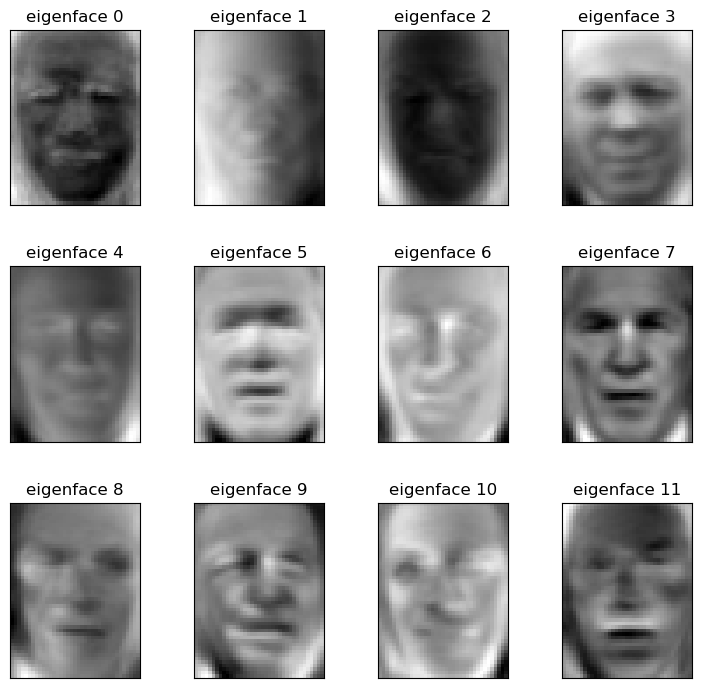

(966,)


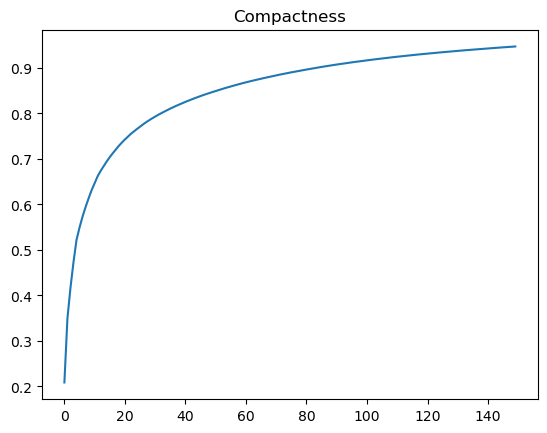

Total Testing 322
Predictions [3 3 6 3 3 3 3 1 3 3 3 3 3 3 3 3 4 3 3 4 1 1 3 3 1 1 3 3 3 3 3 3 3 3 3 3 3
 3 3 1 3 3 3 1 1 3 3 3 4 3 3 3 3 3 1 2 1 3 5 3 6 1 3 4 3 5 1 4 1 3 1 6 3 3
 3 2 3 6 3 3 6 3 3 3 3 3 3 3 3 3 5 6 3 1 1 3 3 1 1 6 3 3 3 3 3 3 3 3 3 1 3
 1 6 3 3 3 1 4 1 3 1 3 3 1 3 4 5 3 1 3 6 6 6 3 3 4 3 3 4 3 3 3 3 1 3 3 3 3
 1 1 1 3 1 3 3 3 6 3 3 3 6 5 5 1 3 3 5 1 3 3 1 3 3 1 5 3 3 3 3 5 3 3 3 1 3
 3 3 3 3 2 6 3 2 3 6 3 3 3 3 3 3 3 3 3 5 1 4 2 4 3 1 5 3 3 4 4 3 1 3 3 3 5
 3 1 1 3 3 3 3 3 3 3 3 3 3 1 1 3 3 3 3 4 3 3 3 3 3 3 3 4 4 3 3 4 3 4 3 1 3
 3 3 3 3 1 3 6 6 1 6 1 6 3 3 3 6 3 3 3 3 3 1 1 3 3 3 1 3 3 3 4 3 3 5 3 3 1
 3 5 3 3 3 6 3 3 1 3 3 3 3 3 3 3 1 3 1 3 3 1 3 3 5 3]
Which Correct: [ True  True  True  True  True  True False  True  True  True  True  True
  True False  True  True False  True  True  True  True False  True False
 False  True False  True  True  True False  True  True  True  True  True
  True  True  True  True  True False  True  True  True False False  True
 False  T

d:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape
# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]
# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

# Split into a training set and a test set using a stratified k fold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

# Center data
mean = np.mean(X_train, axis=0)
X_train -= mean
X_test -= mean
#Eigen-decomposition
U, S, V = np.linalg.svd(X_train, full_matrices=False)
components = V[:n_components]
eigenfaces = components.reshape((n_components, h, w))
#project into PCA subspace
X_transformed = np.dot(X_train, components.T)
print(X_transformed.shape)
X_test_transformed = np.dot(X_test, components.T)
print(X_test_transformed.shape)

import matplotlib.pyplot as plt
# Qualitative evaluation of the predictions using matplotlib
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """
    Helper function to plot a gallery of portraits
    """
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

explained_variance = (S ** 2) / (n_samples - 1)
total_var = explained_variance.sum()
explained_variance_ratio = explained_variance / total_var
ratio_cumsum = np.cumsum(explained_variance_ratio)
print(ratio_cumsum.shape)
eigenvalueCount = np.arange(n_components)
plt.plot(eigenvalueCount, ratio_cumsum[:n_components])
plt.title('Compactness')
plt.show()

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#build random forest
estimator = RandomForestClassifier(n_estimators=150, max_depth=15, max_features=150)
estimator.fit(X_transformed, y_train) #expects X as [n_samples, n_features]
predictions = estimator.predict(X_test_transformed)
correct = predictions==y_test
total_test = len(X_test_transformed)
#print("Gnd Truth:", y_test)
print("Total Testing", total_test)
print("Predictions", predictions)
print("Which Correct:",correct)
print("Total Correct:",np.sum(correct))
print("Accuracy:",np.sum(correct)/total_test)
print(classification_report(y_test, predictions, target_names=target_names))

Now, modify to use torch

Device used is cuda
Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
(966, 150)
(322, 150)


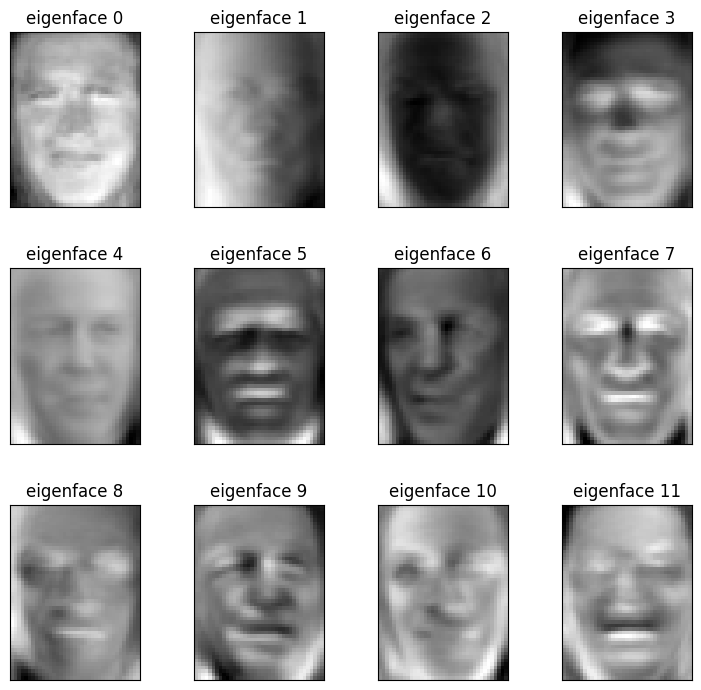

torch.Size([966])


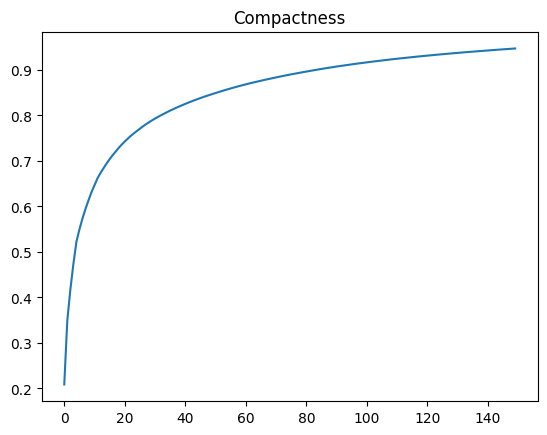

Total Testing 322
Predictions [3 3 6 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 4 1 1 3 3 1 1 3 3 3 3 3 3 3 3 3 3 3
 3 3 1 3 1 3 1 1 3 3 3 4 3 3 3 3 3 1 2 1 3 5 3 1 1 3 3 3 6 3 4 1 3 6 6 3 3
 3 2 3 6 3 3 6 3 3 3 3 3 3 3 3 3 3 6 3 3 1 3 3 1 1 6 3 3 3 3 3 3 3 3 3 1 3
 1 6 3 3 3 1 4 1 3 1 3 3 1 3 4 5 3 1 3 6 6 6 3 3 4 3 3 1 3 2 3 3 1 3 3 3 3
 6 1 1 3 3 3 3 3 6 3 3 3 3 5 5 1 3 6 5 1 3 3 1 3 3 1 5 3 3 3 3 5 3 3 3 1 3
 3 3 3 3 2 5 3 3 3 6 3 3 3 3 3 3 3 3 3 5 1 4 2 6 2 2 5 3 3 3 3 3 1 3 3 3 3
 3 1 1 3 3 3 1 3 3 3 3 3 3 1 3 3 3 3 3 4 3 3 3 3 3 3 3 6 3 3 3 4 3 4 3 1 3
 3 3 3 3 1 3 6 6 1 6 1 6 1 3 3 6 3 3 3 3 3 1 1 3 3 3 1 3 3 3 4 2 3 5 3 3 3
 4 5 3 3 3 6 3 3 1 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 5 3]
Which Correct: [ True  True  True  True  True  True False  True  True  True  True  True
  True False  True  True  True  True  True  True  True False  True False
 False  True False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False False  True
 False  T

c:\Users\Nebula PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Nebula PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Nebula PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _

In [ ]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device used is", device)
# Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape
# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]
# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

# Split into a training set and a test set using a stratified k fold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

# Center data
mean = np.mean(X_train, axis=0)
X_train -= mean
X_test -= mean
#Eigen-decomposition
U, S, V = torch.linalg.svd(torch.from_numpy(X_train), full_matrices=False) # ONLY THE STUFF BENEFITTING FROM PARALLELISAZTION NEED BE CHANGED
components = V[:n_components]
eigenfaces = components.reshape((n_components, h, w))
#project into PCA subspace
X_transformed = np.dot(X_train, components.T)
print(X_transformed.shape)
X_test_transformed = np.dot(X_test, components.T)
print(X_test_transformed.shape)

import matplotlib.pyplot as plt
# Qualitative evaluation of the predictions using matplotlib
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """
    Helper function to plot a gallery of portraits
    """
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

explained_variance = (S ** 2) / (n_samples - 1)
total_var = explained_variance.sum()
explained_variance_ratio = explained_variance / total_var
ratio_cumsum = np.cumsum(explained_variance_ratio)
print(ratio_cumsum.shape)
eigenvalueCount = np.arange(n_components)
plt.plot(eigenvalueCount, ratio_cumsum[:n_components])
plt.title('Compactness')
plt.show()

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#build random forest
estimator = RandomForestClassifier(n_estimators=150, max_depth=15, max_features=150)
estimator.fit(X_transformed, y_train) #expects X as [n_samples, n_features]
predictions = estimator.predict(X_test_transformed)
correct = predictions==y_test
total_test = len(X_test_transformed)
#print("Gnd Truth:", y_test)
print("Total Testing", total_test)
print("Predictions", predictions)
print("Which Correct:",correct)
print("Total Correct:",np.sum(correct))
print("Accuracy:",np.sum(correct)/total_test)
print(classification_report(y_test, predictions, target_names=target_names))

# Part 3

## 3.1


In [1]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import time
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device used is", device)
# Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
# The following code could be used for data preprocessing if using pytorch
X = lfw_people.images
Y = lfw_people.target
# Verify the value range of X_train. No normalization is necessary in this case,
# as the input values already fall within the range of 0.0 to 1.0.
print("X_min:",X.min(),"X_train_max:", X.max())
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]
print("X_train shape:", X_train.shape)

Device used is cuda
X_min: 0.0 X_train_max: 1.0
X_train shape: (966, 1, 50, 37)


In [2]:
# Hyper-parameters
num_epochs = 8
learning_rate = 1e-3
depth = 64
batch_size = 32

In [14]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                              torch.tensor(y_train, dtype=torch.long))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32),
                             torch.tensor(y_test, dtype=torch.long))


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [18]:
class ConvNetwork(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.relu = nn.ReLU()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1) # 1 channel input is the image, 32 filters each layer
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, padding=1) # since input is 1st layer, 32 channel input
        self.bn2 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(2, 2)
        self.classifier = nn.Linear(32*12*9, num_classes)
        self.dropout = nn.Dropout2d(p=0.3)


    def forward(self, x):
        #layer 1
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.pool(x)
        x = self.dropout(x)
        #layer 2
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        
        x = x.view(x.size(0), -1)       

        return self.classifier(x)

In [19]:
model = ConvNetwork(len(lfw_people.target_names))
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [20]:
model.train()
print("> Training")
start = time.time() #time generation
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ("Epoch [{}/{}], Step [{}/{}] Loss: {:.5f}"
                    .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

end = time.time()
elapsed = end - start
print("Training took " + str(elapsed) + " secs or " + str(elapsed/60) + " mins in total")

> Training
Training took 1.4615452289581299 secs or 0.024359087149302166 mins in total


In [ ]:
# Test the model
print("> Testing")
start = time.time() #time generation
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy: {} %'.format(100 * correct / total))

end = time.time()
elapsed = end - start
print("Testing " + str(elapsed) + " secs or " + str(elapsed/60) + " mins in total")



> Testing
Test Accuracy: 90.06211180124224 %
Training took 0.10332393646240234 secs or 0.0017220656077067058 mins in total


## 3.3


See 33.py